            temperature   pm25  pm10
day                                 
2025-08-24         30.7  116.0  46.0
2025-08-25         30.0  109.0  46.0
2025-08-26         30.7  101.0  46.0
2025-08-27         30.1   88.0  41.0
2025-08-28         30.2   79.0  32.0
2025-08-29         30.1   89.0  44.0
2025-08-30         30.5   89.0  46.0


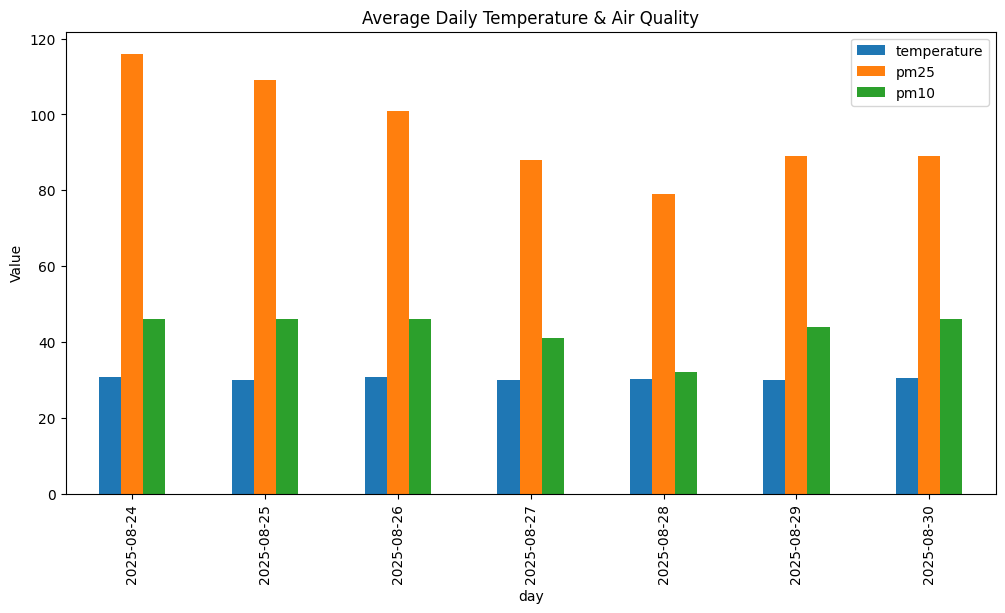

             temperature  humidity  wind_speed      pm25      pm10
temperature     1.000000  0.257381    0.151162  0.399053  0.365456
humidity        0.257381  1.000000   -0.624192  0.796054  0.303859
wind_speed      0.151162 -0.624192    1.000000 -0.740388 -0.513245
pm25            0.399053  0.796054   -0.740388  1.000000  0.702444
pm10            0.365456  0.303859   -0.513245  0.702444  1.000000


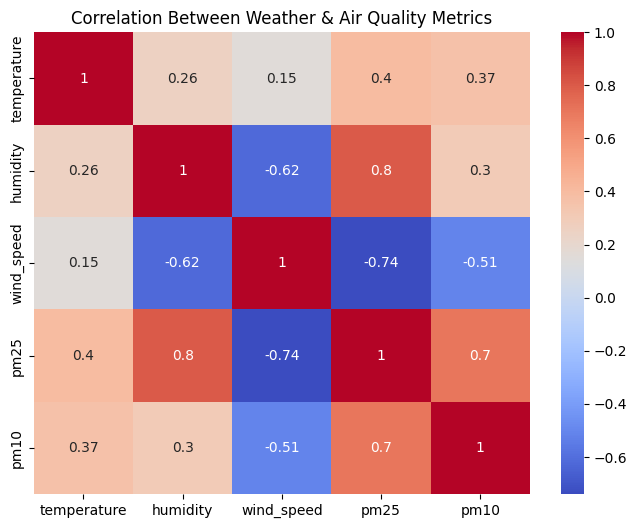

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

load_dotenv()
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

merged_df = pd.read_sql("SELECT * FROM merged_data", engine)
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])
merged_df['day'] = merged_df['datetime'].dt.date

daily_avg = merged_df.groupby('day')[['temperature','pm25','pm10']].mean()
daily_avg.plot(kind='bar', figsize=(12,6))
plt.title("Average Daily Temperature & Air Quality")
plt.ylabel("Value")
plt.show()

corr = merged_df[['temperature','humidity','wind_speed','pm25','pm10']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Weather & Air Quality Metrics")
plt.show()
